In [1]:
%load_ext autoreload
%autoreload 2

# Main setup
import imagej
ij = imagej.init(['io.github.mianalysis:mia-plugin:2.0.0-SNAPSHOT'])

from jpype import JClass
from scyjava import jimport
from src.utilities.imagerenderer import NotebookImageRenderer
from src.wrappers.coordinatesetwrapper import CoordinateSetFactoryWrapper
from src.wrappers.imagewrapper import ImageWrapper
from src.wrappers.measurementwrapper import MeasurementFactoryWrapper
from src.wrappers.metadatawrapper import MetadataWrapper
from src.wrappers.objwrapper import ObjFactoryWrapper
from src.wrappers.objswrapper import ObjsFactoryWrapper
from src.wrappers.volumewrapper import VolumeFactoryWrapper
from src.wrappers.workspacewrapper import WorkspaceWrapper

from src.modules.demomodule import ModuleDemo

import time

# Setting renderer
ImageI = jimport('io.github.mianalysis.mia.object.image.ImageI')
ImageI.setGlobalRenderer(NotebookImageRenderer(ij))
ImageI.setUseGlobalImageRenderer(True)

# Setting objects factory (both obj and objs factories must be enabled together)
ObjsFactories = jimport('io.github.mianalysis.mia.object.ObjsFactories')
objs_factory = ObjsFactoryWrapper()
ObjsFactories.addFactory(objs_factory)
ObjsFactories.setDefaultFactory(objs_factory)

# Setting object factory (both obj and objs factories must be enabled together)
ObjFactories = jimport('io.github.mianalysis.mia.object.coordinates.ObjFactories')
obj_factory = ObjFactoryWrapper()
ObjFactories.addFactory(obj_factory)
ObjFactories.setDefaultFactory(obj_factory)

# Setting volume factory
VolumeFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.VolumeFactories')
volume_factory = VolumeFactoryWrapper()
VolumeFactories.addFactory(volume_factory)
VolumeFactories.setDefaultFactory(volume_factory)

# Setting coordinateset factory
CoordinateSetFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.CoordinateSetFactories')
coordinate_set_factory = CoordinateSetFactoryWrapper()
CoordinateSetFactories.addFactory(coordinate_set_factory)
CoordinateSetFactories.setDefaultFactory(coordinate_set_factory)

# Setting measurement factory
MeasurementFactories = jimport('io.github.mianalysis.mia.object.measurements.MeasurementFactories')
measurement_factory = MeasurementFactoryWrapper()
MeasurementFactories.addFactory(measurement_factory)
MeasurementFactories.setDefaultFactory(measurement_factory)

# Module imports
FilterImage = jimport('io.github.mianalysis.mia.module.images.process.FilterImage')
IdentifyObjects = jimport('io.github.mianalysis.mia.module.objects.detect.IdentifyObjects')
ImageLoader = jimport('io.github.mianalysis.mia.module.inputoutput.ImageLoader')
ShowImage = jimport('io.github.mianalysis.mia.module.visualise.ShowImage')
MeasureObjectShape = jimport('io.github.mianalysis.mia.module.objects.measure.spatial.MeasureObjectShape')
ThresholdImage = jimport('io.github.mianalysis.mia.module.images.process.threshold.GlobalAutoThreshold')
AvailableModules = jimport('io.github.mianalysis.mia.module.AvailableModules')

# # Example of adding modules
# print(AvailableModules.getModuleNames(True).size())
# AvailableModules.addModuleName(ModuleDemo(None))
# print(AvailableModules.getModuleNames(False).size())

# # Example of loading a module through reflection
# cl = JClass(str(AvailableModules.getModuleNames(False).get(42)))
# cc = cl(None) # The module constructor
# print(cc.getShortDescription()) # Showing it's worked

[ERROR] Cannot create plugin: org.scijava.plugins.scripting.javascript.JavaScriptScriptLanguage


[INFO] Overriding MIA; identifier: command:io.github.mianalysis.mia.MIA_; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-plugin-2.0.0-SNAPSHOT.jar
[INFO] Overriding MIA (headless); identifier: command:io.github.mianalysis.mia.MIAHeadless; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-core-2.0.0-SNAPSHOT.jar


IMPORTANT: Find out dimension order for np_img in Image class, but for now assuming XYCZT
Objs: Add applySpatioTemporalCalibration to created image (convertToImage)


<java object 'io.github.mianalysis.mia.object.system.Status'>

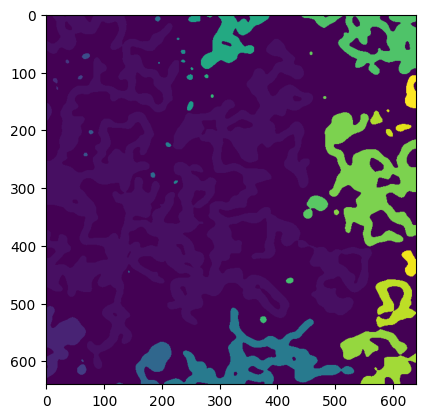

In [24]:
input_path = "/Users/sc13967/Documents/Programming/Python/mia-python/Ex3_Skeletonisation.tif"
series_number = 1
image_name = "demo"
objects_name = "DNA"

workspace = WorkspaceWrapper(1, input_path, series_number, None)

imageLoader = ImageLoader(None)
imageLoader.updateParameterValue(ImageLoader.OUTPUT_IMAGE, image_name)
imageLoader.updateParameterValue(ImageLoader.SET_SPATIAL_CAL, True)
imageLoader.updateParameterValue(ImageLoader.XY_CAL, 1)
imageLoader.updateParameterValue(ImageLoader.Z_CAL, 1)
imageLoader.setShowOutput(False)
imageLoader.process(workspace)

filterImage = FilterImage(None)
filterImage.updateParameterValue(FilterImage.INPUT_IMAGE, image_name)
filterImage.updateParameterValue(FilterImage.FILTER_MODE, FilterImage.FilterModes.GAUSSIAN2D)
filterImage.updateParameterValue(FilterImage.FILTER_RADIUS, 5)
filterImage.setShowOutput(False)
filterImage.process(workspace)

thresholdImage = ThresholdImage(None)
thresholdImage.updateParameterValue(ThresholdImage.INPUT_IMAGE, image_name)
thresholdImage.setShowOutput(False)
thresholdImage.process(workspace)

identifyObjects = IdentifyObjects(None)
identifyObjects.updateParameterValue(IdentifyObjects.INPUT_IMAGE, image_name)
identifyObjects.updateParameterValue(IdentifyObjects.OUTPUT_OBJECTS, objects_name)
identifyObjects.updateParameterValue(IdentifyObjects.ENABLE_MULTITHREADING, False)
identifyObjects.setShowOutput(True)
identifyObjects.process(workspace)

In [27]:
measureObjectShape = MeasureObjectShape(None)
measureObjectShape.updateParameterValue(MeasureObjectShape.INPUT_OBJECTS, objects_name)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_PROJECTED_AREA, True)
measureObjectShape.setShowOutput(True)

Exception = jimport('java.lang.Exception')
try:
    status = measureObjectShape.process(workspace)

except Exception as ex: # type: ignore
    print("Exception:")
    ex.printStackTrace()

Measurement: Implement units conversion in __init__Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__

Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement: Implement units conversion in __init__
Measurement:

In [26]:
from typing import List
from src.wrappers.coordinatesetwrapper import CoordinateSetWrapper
from src.wrappers.measurementwrapper import MeasurementWrapper
from src.wrappers.objswrapper import ObjsWrapper
from src.wrappers.objwrapper import ObjWrapper

from src.objects.measurement import  Measurement
from src.objects.obj import  Obj

ow: ObjsWrapper = workspace.getObjects(objects_name)
o: ObjWrapper = ow.values()[0]
oo: Obj = o.getPythonObj()
oo.getMeasurements()

{'SHAPE // N_VOXELS': <src.objects.measurement.Measurement at 0x355b8bf80>,
 'SHAPE // VOLUME_(PX³)': <src.objects.measurement.Measurement at 0x355b8be90>,
 'SHAPE // VOLUME_(${SCAL}³)': <src.objects.measurement.Measurement at 0x355b8a0f0>,
 'SHAPE // BASE_AREA_(PX²)': <src.objects.measurement.Measurement at 0xa9253a0c0>,
 'SHAPE // BASE_AREA_(${SCAL}²)': <src.objects.measurement.Measurement at 0xa92539fd0>,
 'SHAPE // HEIGHT_(SLICE)': <src.objects.measurement.Measurement at 0xa9292f5c0>,
 'SHAPE // HEIGHT_(${SCAL})': <src.objects.measurement.Measurement at 0xa9292ea50>,
 'SHAPE // PROJ_AREA_(PX²)': <src.objects.measurement.Measurement at 0xa9253a120>,
 'SHAPE // PROJ_AREA_(${SCAL}²)': <src.objects.measurement.Measurement at 0xa9253a150>}